# Race Review: PSSC Saturday

This is a general page that will display info about a race day.

In [1]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2020-10-27 21:05:07,426|INFO|read_metadata| Read 93 records.
2020-10-27 21:05:07,427|INFO|read_logs| Reading file 2020-10-10_09:54.pd.gz
2020-10-27 21:05:08,973|INFO|read_log_file| Session from 2020-10-10 16:54:12.020000, 295618 rows, 8.21111111111111 hours.
2020-10-27 21:05:09,823|INFO|read_logs| Found 295617 records before trim.


<IPython.core.display.Javascript object>


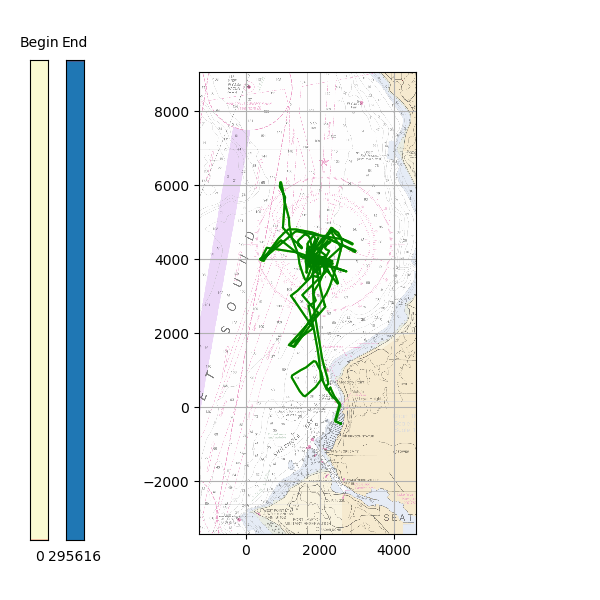

In [17]:
date = '2020-10-10'
df, race = race_logs.read_date(date, race_trim=False)
chart = ch.trim_track(df)

In [3]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

<IPython.core.display.Javascript object>


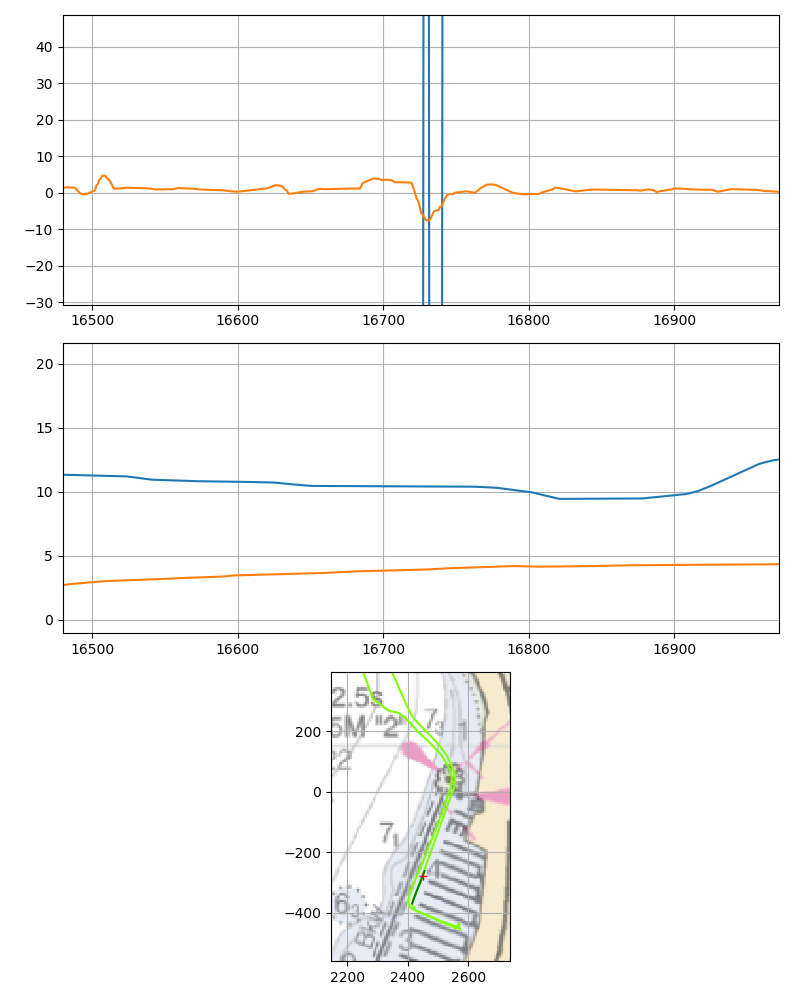

{'lat_max': 47.76875596,
 'lat_min': 47.65642784,
 'lon_max': -122.3771886,
 'lon_min': -122.4555341,
 'proj': ' +proj=tmerc +lat_0=47.6873070 +lon_0=-122.4386440 +k_0=0.9996 +datum=WGS84 +units=m +no_defs ',
 'pixels': 2000,
 'south': -3431.7550843985696,
 'north': 9054.111215604971,
 'east': 4604.745548462768,
 'west': -1268.268171380548,
 'path': '/tmp/mbtile.tif',
 'source': 'Data/MBTILES/MBTILES_06.mbtiles',
 'image': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [239, 216, 163],
         [176, 159, 120],
         [ 49,  44,  33]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [239, 216, 163],
         [176, 159, 120],
         [ 49,  44,  33]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [239, 216, 163],
         [176, 159, 120],
         [ 49,  44,  33]],
 
        ...,
 
        [[255, 255, 255],
         [255,

In [18]:
ch.chart_and_plot(df, None, (df.awa, df.rudder), (df.tws*1.944, df.spd*1.944))

In [4]:
df.spd.max() * 1.944, df.sog.max() * 1.944

(7.4432353274906555, 8.932329109239127)

In [5]:
df.columns

Index(['rhdg', 'rsog', 'latitude', 'longitude', 'row_seconds', 'turn_rate',
       'rudder', 'zeus_cog', 'zeus_sog', 'raws', 'rawa', 'variation', 'rspd',
       'depth', 'zeus_altitude', 'zeus_gnss_type', 'altitude',
       'geoidal_separation', 'zg100_pitch', 'zg100_roll', 'rcog', 'timestamp',
       'awa', 'aws', 'cawa', 'caws', 'scawa', 'scaws', 'twd', 'tws', 'twa',
       'stwd', 'stws', 'stwa', 'spd', 'sog', 'hdg', 'cog', 'row_times'],
      dtype='object')

<IPython.core.display.Javascript object>


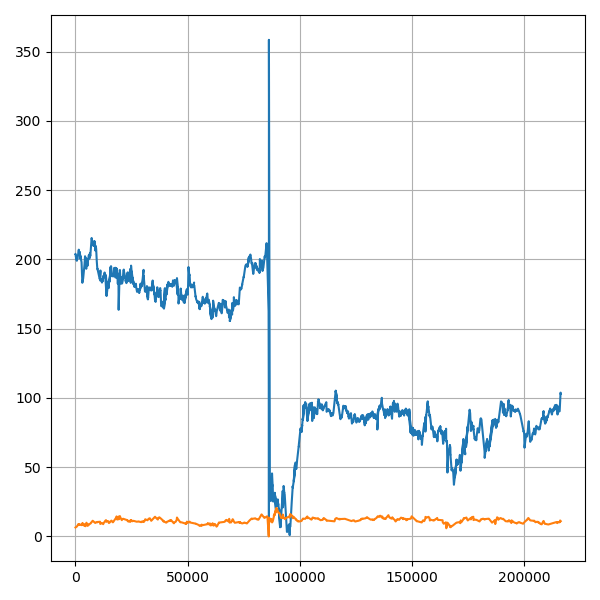

In [6]:
ccc = ch.quick_plot(None, (df.twd, df.tws*1.944 ))

<IPython.core.display.Javascript object>


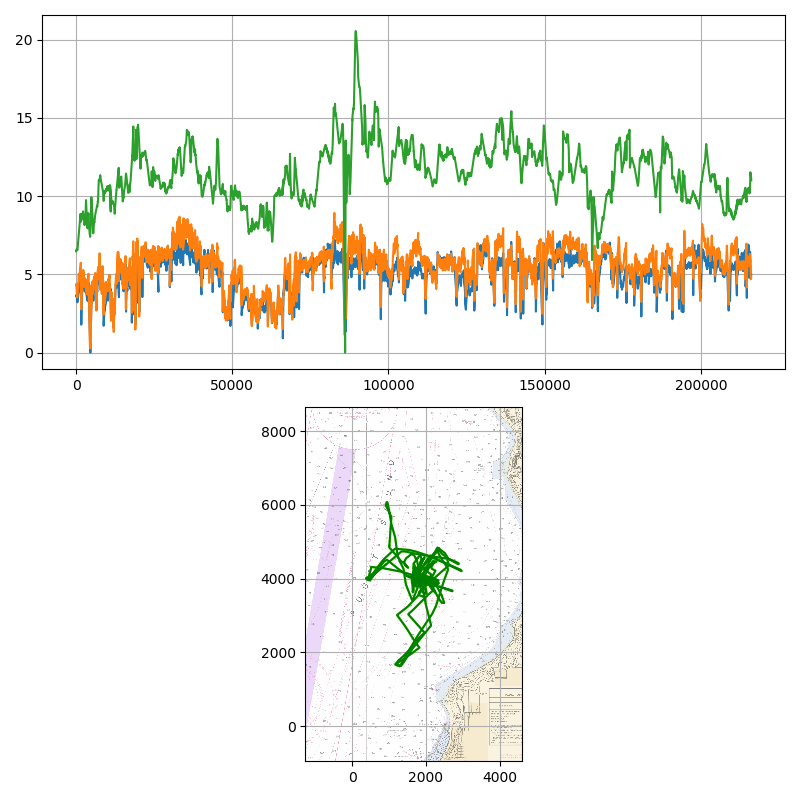

In [7]:
ccc = ch.chart_and_plot(df, None, [v*1.944 for v in (df.spd, df.sog, df.tws)])

<IPython.core.display.Javascript object>


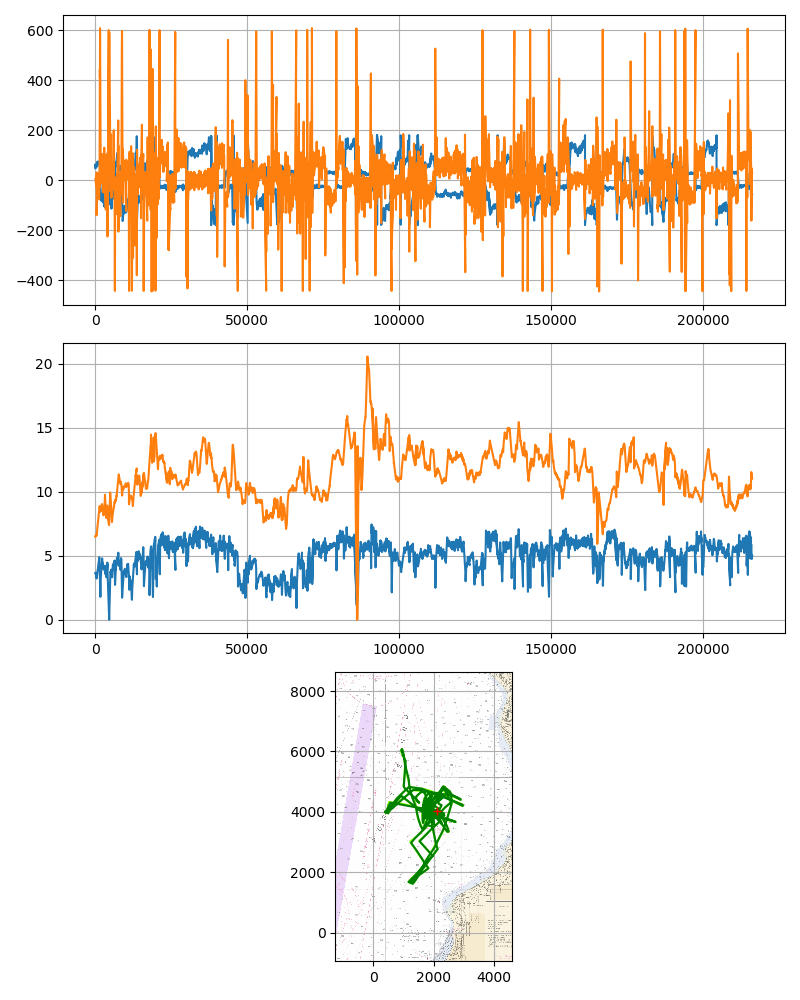

In [9]:
ccc = ch.chart_and_plot(df, None, (df.awa, df.rudder*10), (df.spd*1.944, df.tws*1.944))

In [65]:
sss, rrr = p.exponential_filter(np.array(df.rspd), 0.999, 0.5)
sss

array([3.75  , 3.75  , 3.75  , ..., 3.4213, 3.421 , 3.4207])

<IPython.core.display.Javascript object>


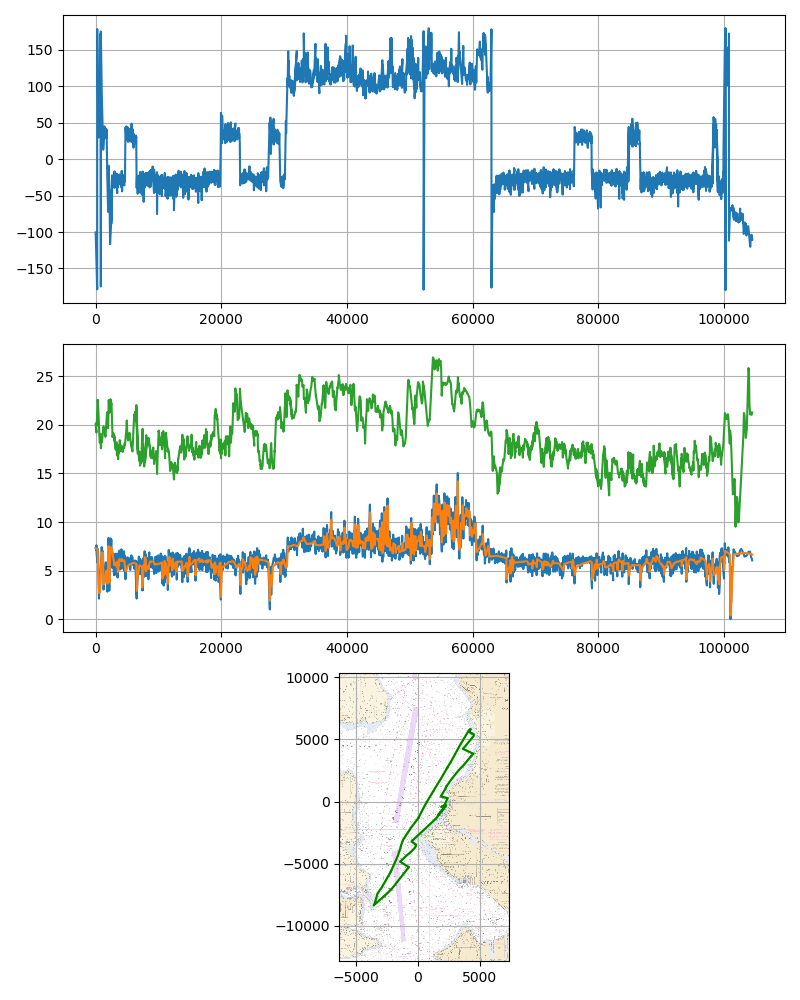

In [66]:
ccc = ch.chart_and_plot(df, None, (df.awa,), (df.spd*1.944, sss*1.944, df.tws*1.944))

In [84]:
heel, rrr = p.exponential_filter(np.array(df.zg100_roll), 0.9999, 15)
heel

array([ 12.7   ,  12.7   ,  12.7   , ..., -13.0142, -13.0137, -13.0132])

<IPython.core.display.Javascript object>


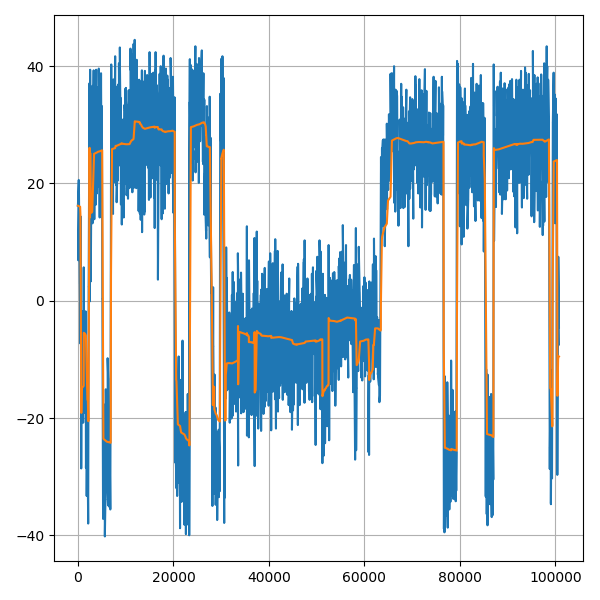

{'trim_func': <function chart.quick_plot_ax.<locals>.trim_func(*args)>,
 'update_func': <function chart.quick_plot_ax.<locals>.update_func(begin, end)>}

In [85]:
ch.quick_plot(None, (df.zg100_roll+3.5, heel+3.5 ))

In [106]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.99, 1000)
rudder

array([15.4   , 15.408 , 15.4179, ..., -1.7975, -1.7455, -1.692 ])

<IPython.core.display.Javascript object>


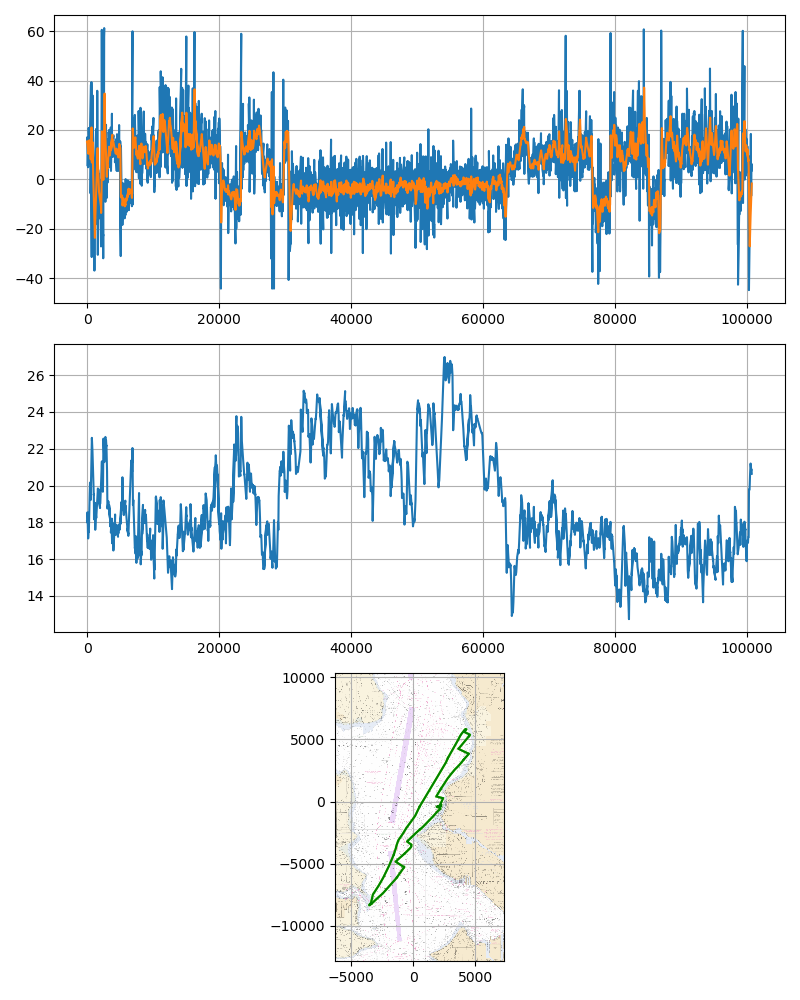

In [116]:
ccc = ch.chart_and_plot(df, None, (df.rudder, rudder), (df.tws*1.944, ))

In [114]:
sdf = df.iloc[8000:18000]
sdf.row_times

31541   2020-10-24 11:25:21.669057247-07:00
31542   2020-10-24 11:25:21.769173399-07:00
31543   2020-10-24 11:25:21.869289551-07:00
31544   2020-10-24 11:25:21.969405702-07:00
31545   2020-10-24 11:25:22.069521854-07:00
                        ...                
41536   2020-10-24 11:42:01.172258167-07:00
41537   2020-10-24 11:42:01.272336120-07:00
41538   2020-10-24 11:42:01.372414073-07:00
41539   2020-10-24 11:42:01.472492026-07:00
41540   2020-10-24 11:42:01.572569979-07:00
Name: row_times, Length: 10000, dtype: datetime64[ns, US/Pacific]

In [73]:
help(ch)

Help on module chart:

NAME
    chart - # Charting and Graphing

DESCRIPTION
    Collection of tools to create sailing charts, display race tracks, and plot instrument data.
    
    Most interesting part is the generation of GEO-registered charts, upon which lat/lon
    positions can be scale accurately ploted.
    
    Warning this is a [Literate Notebook](Literate_Notebook_Module.ipynb), i.e. the notebook contains the code for the charting module.  Do not edit the code in the module directly, edit the notebook and then regenerate the module code.
    
        convert_notebook.py Chart_Module.ipynb --module

FUNCTIONS
    chart_and_plot(df, index, data, data2=None)
        Create a figure with one or two plots of data, along with a synced chart/track.
        
        - If you zoom/pan the top plot, then the track will display the region of interest.
        - If you click on either plot, then the point on the chart will be highlighted.
    
    chart_update_functions(chart, skip=Non

In [54]:
df.iloc[ccc.begin:ccc.end].row_times

87608   2020-10-24 12:58:48.187999686-07:00
87609   2020-10-24 12:58:48.288019644-07:00
87610   2020-10-24 12:58:48.388039602-07:00
87611   2020-10-24 12:58:48.488059560-07:00
87612   2020-10-24 12:58:48.588079518-07:00
                        ...                
96836   2020-10-24 13:14:10.986340714-07:00
96837   2020-10-24 13:14:11.086380657-07:00
96838   2020-10-24 13:14:11.186416605-07:00
96839   2020-10-24 13:14:11.286452554-07:00
96840   2020-10-24 13:14:11.386488502-07:00
Name: row_times, Length: 9233, dtype: datetime64[ns, US/Pacific]

In [43]:
df.columns

Index(['turn_rate', 'rudder', 'rhdg', 'raws', 'rawa', 'rsog', 'latitude',
       'longitude', 'row_seconds', 'zeus_cog', 'zeus_sog', 'zeus_altitude',
       'zeus_gnss_type', 'variation', 'altitude', 'geoidal_separation',
       'zg100_pitch', 'zg100_roll', 'rspd', 'depth', 'rcog', 'timestamp',
       'awa', 'aws', 'cawa', 'caws', 'scawa', 'scaws', 'twd', 'tws', 'twa',
       'stwd', 'stws', 'stwa', 'spd', 'sog', 'hdg', 'cog', 'row_times'],
      dtype='object')

<IPython.core.display.Javascript object>


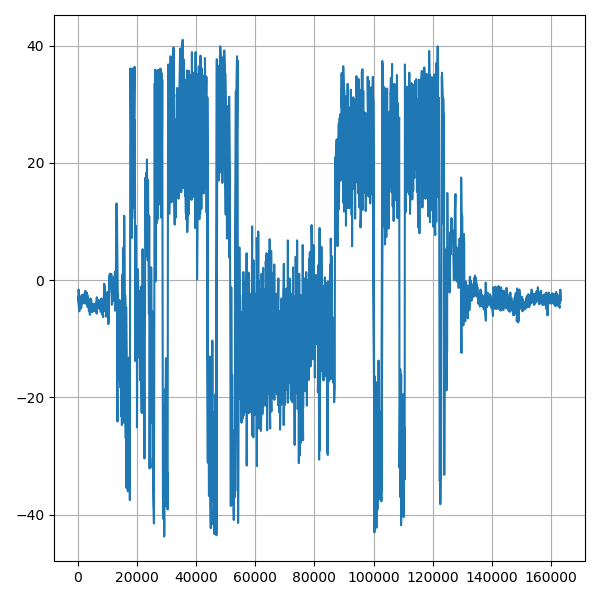

{'trim_func': <function chart.quick_plot_ax.<locals>.trim_func(*args)>,
 'update_func': <function chart.quick_plot_ax.<locals>.update_func(begin, end)>}

In [55]:
ch.quick_plot(None, (df.zg100_roll, ))

<IPython.core.display.Javascript object>


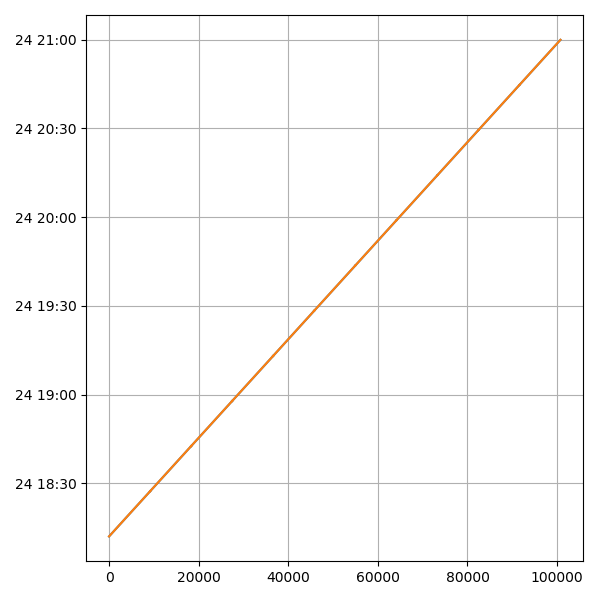

/Users/viola/GDrive/Sailboat/Code/Python/sailing/chart.py:289: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  np_data = [np.asarray(d) for d in data]


23541    2020-10-24 18:12:01.070
23542    2020-10-24 18:12:01.070
23543    2020-10-24 18:12:01.070
23544    2020-10-24 18:12:01.070
23545    2020-10-24 18:12:02.070
                   ...          
124299   2020-10-24 20:59:57.090
124300   2020-10-24 20:59:57.090
124301   2020-10-24 20:59:57.090
124302   2020-10-24 20:59:57.090
124303   2020-10-24 20:59:57.090
Name: timestamp, Length: 100763, dtype: datetime64[ns]

In [72]:
ch.quick_plot(None, (df.timestamp, df.row_times))
df.timestamp

In [59]:
df.iloc[124693:130000].spd

124698   3.148
124699   3.148
124700   3.149
124701   3.251
124702   3.333
          ... 
130000   3.271
130001   3.319
130002   3.357
130003   3.388
130004   3.412
Name: spd, Length: 5307, dtype: float64

<IPython.core.display.Javascript object>


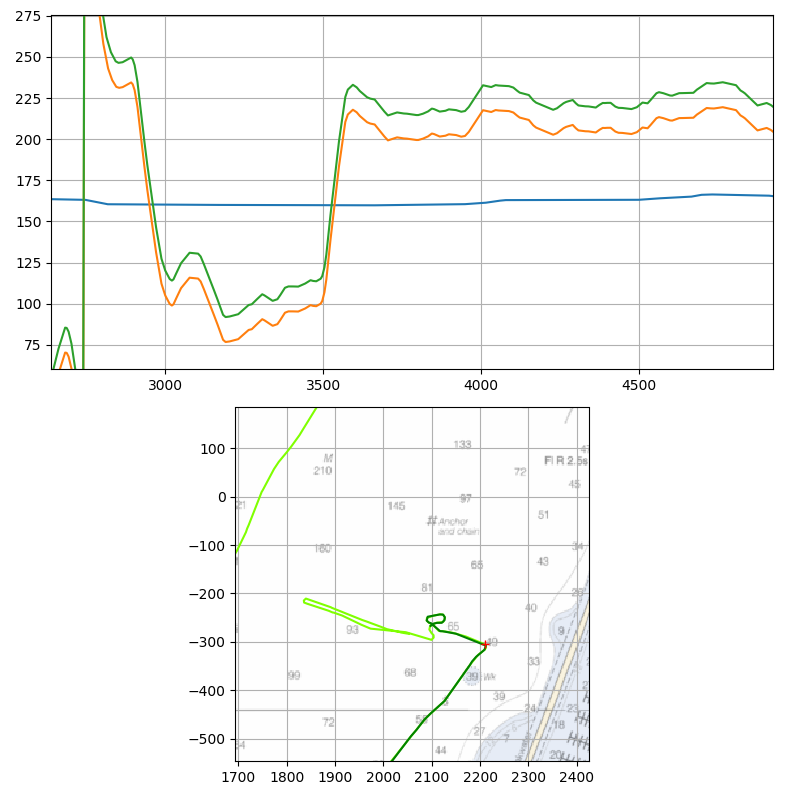

In [13]:
cc = ch.chart_and_plot(sdf, None, (sdf.stwd, sdf.hdg, sdf.hdg+variation))

In [14]:
sdf.tws

45484   4.840
45485   4.839
45486   4.839
45487   4.838
45488   4.837
         ... 
57105   5.176
57106   5.176
57107   5.175
57108   5.175
57109   5.174
Name: tws, Length: 11626, dtype: float64

<IPython.core.display.Javascript object>


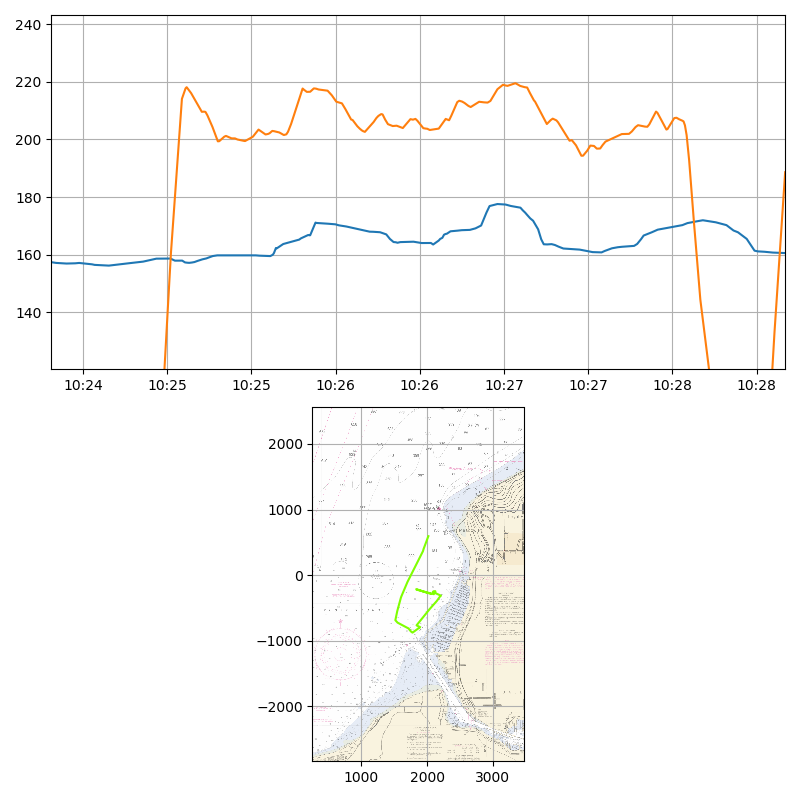

In [15]:
cc = ch.chart_and_plot(sdf, sdf.row_times, (sdf.twd, sdf.hdg))

In [21]:
sdf.columns

Index(['rhdg', 'raws', 'rawa', 'rudder', 'turn_rate', 'rsog', 'latitude',
       'longitude', 'row_seconds', 'zeus_cog', 'zeus_sog', 'variation', 'rspd',
       'depth', 'altitude', 'geoidal_separation', 'zg100_pitch', 'zg100_roll',
       'zeus_altitude', 'zeus_gnss_type', 'rcog', 'timestamp', 'awa', 'aws',
       'cawa', 'caws', 'scawa', 'scaws', 'twd', 'tws', 'twa', 'stwd', 'stws',
       'stwa', 'spd', 'sog', 'hdg', 'cog', 'row_times'],
      dtype='object')

In [24]:
sdf.row_times

45484   2020-10-17 10:19:07.777610368-07:00
45485   2020-10-17 10:19:07.877635901-07:00
45486   2020-10-17 10:19:07.977661434-07:00
45487   2020-10-17 10:19:08.077686967-07:00
45488   2020-10-17 10:19:08.177709947-07:00
                        ...                
57105   2020-10-17 10:38:29.878935895-07:00
57106   2020-10-17 10:38:29.979055994-07:00
57107   2020-10-17 10:38:30.079176092-07:00
57108   2020-10-17 10:38:30.179284181-07:00
57109   2020-10-17 10:38:30.279392269-07:00
Name: row_times, Length: 11626, dtype: datetime64[ns, US/Pacific]